## To use this slideshow:
- Run All, using the menu item: Kernel/Restart & Run All
- Return to this top cell
- click on "Slideshow" menu item above, that looks like this:
![](images/SlideIcon.png)

![](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)


![](NotebookBanner_Usinggeospatialclassrooms.jpg)
#### link here http://tinyurl.com/y9b474gd 
    
### June 25, 2020 with LG Funderburk  

## Overview

1. What is geospatial data?
2. What are the main components in geospatial data?
3. Main types of geospatial data
4. Why geospatial data?
5. An example using open data: Public Art in Vancouver

## What is geospatial data

Geospatial data is data about objects, events, or phenomena that have a location on the surface of the earth. 

The location can be static in the short-term 

* examples: location of a road, impact of a natural disaster event.

Or dynamic 

* examples: a moving vehicle or pedestrian, the spread of an infectious disease. 



## What does geospatial data look like?


<center><img src="./images/Geographical-distribution-of-sampling-sites-Soil-sampling-locations-across-Britain-are.png" alt="Drawing" style="width: 360px;"/></center>

Source: Malik et al. (2018). Land use driven change in soil pH affects microbial carbon cycling processes. Nature Communications. 9. 10.1038/s41467-018-05980-1. 

## What is geospatial data composed of?

Geospatial data combines:

1. Location information (usually coordinates), 

2. Attribute information (the characteristics of the object, event, or phenomena), 

3. Temporal information (the time or life span at which the location and attributes exist).

## Types of geospatial data

The two primary types of geospatial data are raster and vector data. 

Raster data is stored as a grid of values which are rendered on a map as pixels. Each pixel value represents an area on the Earth’s surface. 

<center><img src="./images/raster.png" alt="Drawing" style="width: 300px;"/></center>


Vector data is stored as a collection of `x,y` pairs (each pair represents an individual location). The pairs `(x,y)` are points - which can be joined to form lines or polygons. In this workshop we will work with vector data. 

<center><img src="./images/VR.png" alt="Drawing" style="width: 300px;"/></center>


## Why geospatial data?

A lot of geospatial data can be useful when studying roads, localities, water bodies, public amenities, and even diseases. 


In [1]:
%%capture
!pip install folium 

In [2]:
import requests as r
import pandas as pd
from folium.plugins import MarkerCluster
import plotly.express as px
import plotly.graph_objects as go
# Plot the data on map (map location is provided) using folium and for loop for plotting all the points
import folium

In [3]:
# Reading in the data
deaths = pd.read_csv("datasets/deaths.csv")


# Define the new names of your columns
newcols = {
    'Death': 'death_count',
    'X coordinate': 'x_latitude', 
    'Y coordinate': 'y_longitude' 
    }

# Rename your columns
deaths.rename(columns = newcols,inplace = True)

# Create `locations` by subsetting only Latitude and Longitude from the dataset 
locations = deaths[['x_latitude','y_longitude']]

# Create `deaths_list` by transforming the DataFrame to list of lists 
deaths_list = locations.values.tolist()

# Import the data
pumps = pd.read_csv("datasets/pumps.csv")

# Subset the DataFrame and select just ['X coordinate', 'Y coordinate'] columns
locations_pumps = pumps[['X coordinate', 'Y coordinate']]

# Transform the DataFrame to list of lists in form of ['X coordinate', 'Y coordinate'] pairs
pumps_list = locations_pumps.values.tolist()

# Create a for loop and plot the data using folium (use previous map + add another layer)

map0 = folium.Map(location=[51.5132119,-0.13666], tiles='stamenterrain', zoom_start=17)
# Provide initial coordinates
for point in range(0, len(deaths_list)):
    folium.CircleMarker(deaths_list[point], 
                        radius=8, color='red', fill=True, fill_color='red', opacity = 0.4).add_to(map0)

### Example: 1854 Cholera Outbreak in Soho, London

* In 1854 Soho was hit hard by a terrible outbreak of cholera. 
* At the time it was believed that cholera was caused by "bad air", however Dr. John Snow, who lived near Soho, was skeptical of this theory. 
* Dr. Snow used what we now know as geospatial data to argue that the disease was spread by drinking contaminated water.
* He found the source of the outbreak.


|death_count|	x_latitude	|y_longitude|
|-|-|-|
|	1	|51.513418	|-0.137930|
|	1	|51.513418	|-0.137930|
|	1	|51.513418	|-0.137930|

Dataset obtained from Datacamp's Project: Recreating John Snow's Ghost Map

Visit https://learn.datacamp.com/projects/132 to learn more. 

In [4]:
# Add pumps
map1 = map0
for point in range(0, len(pumps_list)):
    folium.Marker(pumps_list[point], popup=pumps['Pump Name'][point]).add_to(map1)
    
map1

### Sept 8 1854 - bye bye Broad St. pump handle

Although people were skeptical of Dr. Snow's theory, they removed the handle of the pump located on Broad St. 

Later it was found that the pump was contaminated with sewage.Here is a picture of the pump in Broad Street. 

<center><img src="./images/900px-John_Snow_memorial_and_pub.jpg" alt="Drawing" style="width: 280px;"/></center>

Source: https://commons.wikimedia.org/wiki/File:John_Snow_memorial_and_pub.jpg


### Visualizing an open data set: Vancouver Public Art

Let's download Open Data from Vancouver using its API

Website: https://opendata.vancouver.ca/explore/dataset/public-art/information/?location=14,49.264,-123.15047

Raw data

https://opendata.vancouver.ca/api/records/1.0/search/?dataset=public-art&q=&rows=500&facet=type&facet=status&facet=sitename&facet=siteaddress&facet=primarymaterial&facet=ownership&facet=neighbourhood&facet=artists&facet=photocredits

In [5]:
import requests as r
import pandas as pd
art_url = 'https://opendata.vancouver.ca/api/records/1.0/search/?dataset=public-art&q=&rows=500&facet=type&facet=status&facet=sitename&facet=siteaddress&facet=primarymaterial&facet=ownership&facet=neighbourhood&facet=artists&facet=photocredits'
API_response_art =r.get(art_url)
art_data = API_response_art.json()

art_df = pd.json_normalize(art_data,record_path='records')

art_df.head()

datasetid                                  recordid  \
0  public-art  0247724b241e2414f770a80af4fbbd4b78b5b5a4   
1  public-art  dca3042258484769277a8fad001ebac0dfc16f98   
2  public-art  d11e027f8f3e336c8076b5727c5ccfe0955c3ec0   
3  public-art  f90d79cd27ef3a24e0908c7ddc6f27d65d5f6a0b   
4  public-art  53759e9450bd586b4355dff0c5edfe7603a9a1df   

                   record_timestamp fields.status  \
0  2020-06-22T10:31:46.074000+00:00      In place   
1  2020-06-22T10:31:46.074000+00:00      In place   
2  2020-06-22T10:31:46.074000+00:00      In place   
3  2020-06-22T10:31:46.074000+00:00       Removed   
4  2020-06-22T10:31:46.074000+00:00      In place   

                            fields.descriptionofwork  \
0  A full figure bronze statue of Captain George ...   
1  This classic bust depicts the entrepreneur Cha...   
2  An abstract sculpture of stainless steel with ...   
3  A glass prism on a bronze pedestal contains si...   
4  This carved granite postman bas-relief by Paul...   

  fields.yearofinstallation  fields.photourl.mimetype  \
0                      1936  application/octet-stream   
1                      1977  application/octet-stream   
2                      1986  application/octet-stream   
3                      1972  application/octet-stream   
4                      1955  application/octet-stream   

       fields.photourl.format fields.photourl.filename  fields.photourl.width  \
0     aspx?AreaId=1&ImageId=1               LAW1-1.jpg                  300.0   
1  aspx?AreaId=8&ImageId=1615         LBentallBust.JPG                  300.0   
2   aspx?AreaId=27&ImageId=21              LAW27-1.jpg                  300.0   
3   aspx?AreaId=31&ImageId=25              LAW31-1.jpg                  300.0   
4   aspx?AreaId=42&ImageId=34              LAW42-1.jpg                  300.0   

   ...   fields.geom.coordinates     fields.photocredits   fields.ownership  \
0  ...  [-123.113918, 49.261185]            Barbara Cole  City of Vancouver   
1  ...    [-123.1178, 49.286828]                     NaN            private   
2  ...  [-123.133965, 49.293313]  SITE Photography, 2016  City of Vancouver   
3  ...    [-123.1122, 49.278977]                     NaN  City of Vancouver   
4  ...    [-123.11481, 49.28063]       Maxime Cyr-Morton    Privately owned   

  fields.artists       fields.siteaddress  \
0             98     453 West 12th Avenue   
1            241       501 Burrard Street   
2            103  Denman & Georgia Street   
3            264  Georgia & Beatty Street   
4             76         349 West Georgia   

                       fields.artistprojectstatement fields.geo_local_area  \
0  A new city hall and a statue of Captain George...        Mount Pleasant   
1                                                NaN              Downtown   
2  "McHaffie says she means to show movement, but...              Downtown   
3                                                NaN              Downtown   
4                                                NaN              Downtown   

  fields.type     fields.primarymaterial  \
0  Figurative                     bronze   
1  Figurative                     bronze   
2   Sculpture     Stainless steel, cedar   
3   Sculpture  Glass, Plexiglas & bronze   
4      Relief                Red granite   

                               fields.locationonsite  
0       North entrance, exterior, in front of stairs  
1  Moved to plaza level between 555 & 595 Burrard...  
2                          Lawn along Georgia Street  
3                                S.W. corner of park  
4                          SW corner on Homer Street  

[5 rows x 28 columns]

Notice that the coordinates are in a single pair [-123.113918, 49.261185]	

We will need to split these into two columns, Latitude and Longitude. 

In [6]:
SC_COORDINATES = [49.2827, -123.1207]
lon = []
lat = []
for item in art_df['fields.geom.coordinates'].to_list():
    if type(item) !=float:
        lon.append(item[0])
        lat.append(item[1])
    else:
        lon.append(SC_COORDINATES[1])
        lat.append(SC_COORDINATES[0])
        
art_df['longitude'] = lon
art_df['latitude'] = lat
art_df.head()

datasetid                                  recordid  \
0  public-art  0247724b241e2414f770a80af4fbbd4b78b5b5a4   
1  public-art  dca3042258484769277a8fad001ebac0dfc16f98   
2  public-art  d11e027f8f3e336c8076b5727c5ccfe0955c3ec0   
3  public-art  f90d79cd27ef3a24e0908c7ddc6f27d65d5f6a0b   
4  public-art  53759e9450bd586b4355dff0c5edfe7603a9a1df   

                   record_timestamp fields.status  \
0  2020-06-22T10:31:46.074000+00:00      In place   
1  2020-06-22T10:31:46.074000+00:00      In place   
2  2020-06-22T10:31:46.074000+00:00      In place   
3  2020-06-22T10:31:46.074000+00:00       Removed   
4  2020-06-22T10:31:46.074000+00:00      In place   

                            fields.descriptionofwork  \
0  A full figure bronze statue of Captain George ...   
1  This classic bust depicts the entrepreneur Cha...   
2  An abstract sculpture of stainless steel with ...   
3  A glass prism on a bronze pedestal contains si...   
4  This carved granite postman bas-relief by Paul...   

  fields.yearofinstallation  fields.photourl.mimetype  \
0                      1936  application/octet-stream   
1                      1977  application/octet-stream   
2                      1986  application/octet-stream   
3                      1972  application/octet-stream   
4                      1955  application/octet-stream   

       fields.photourl.format fields.photourl.filename  fields.photourl.width  \
0     aspx?AreaId=1&ImageId=1               LAW1-1.jpg                  300.0   
1  aspx?AreaId=8&ImageId=1615         LBentallBust.JPG                  300.0   
2   aspx?AreaId=27&ImageId=21              LAW27-1.jpg                  300.0   
3   aspx?AreaId=31&ImageId=25              LAW31-1.jpg                  300.0   
4   aspx?AreaId=42&ImageId=34              LAW42-1.jpg                  300.0   

   ...   fields.ownership  fields.artists       fields.siteaddress  \
0  ...  City of Vancouver              98     453 West 12th Avenue   
1  ...            private             241       501 Burrard Street   
2  ...  City of Vancouver             103  Denman & Georgia Street   
3  ...  City of Vancouver             264  Georgia & Beatty Street   
4  ...    Privately owned              76         349 West Georgia   

                       fields.artistprojectstatement  fields.geo_local_area  \
0  A new city hall and a statue of Captain George...         Mount Pleasant   
1                                                NaN               Downtown   
2  "McHaffie says she means to show movement, but...               Downtown   
3                                                NaN               Downtown   
4                                                NaN               Downtown   

  fields.type     fields.primarymaterial  \
0  Figurative                     bronze   
1  Figurative                     bronze   
2   Sculpture     Stainless steel, cedar   
3   Sculpture  Glass, Plexiglas & bronze   
4      Relief                Red granite   

                               fields.locationonsite   longitude   latitude  
0       North entrance, exterior, in front of stairs -123.113918  49.261185  
1  Moved to plaza level between 555 & 595 Burrard... -123.117800  49.286828  
2                          Lawn along Georgia Street -123.133965  49.293313  
3                                S.W. corner of park -123.112200  49.278977  
4                          SW corner on Homer Street -123.114810  49.280630  

[5 rows x 30 columns]

Let's plot our coordinates as a scatter plot.

In [7]:
# Attention! IN PYTHON WE USE LON, LAT not LAT, LON
# LON -180 to 180, LAT -90 to 90
px.scatter(art_df,x="longitude",y='latitude',title='Locations of public art as a scatterplot')

Let's add a background map. 

First, let's locate Vancouver. Its coordinates are given by 

49.2827° N, 123.1207° W

These coordinates are given in EPSG 4326 - we will transform into EPSF 3857 and plot. Note: coordinate systems are outside the scope of this workshop. 

The transformation can be computed using Python as follows:

In [8]:
%%capture
!pip install contextily
print("Success!")

In [9]:
# Transforming the data 
from pyproj import Proj, transform
outProj = Proj(init='epsg:3857')
inProj = Proj(init='epsg:4326')
x1,y1 = SC_COORDINATES[0],SC_COORDINATES[1]
x2,y2 = transform(inProj,outProj,y1,x1)

print("Original coordinates: ",SC_COORDINATES[1],", ",SC_COORDINATES[0])
print("Transformed coordinates: ",x2,", ",y2)

Original coordinates:  -123.1207 ,  49.2827
Transformed coordinates:  -13705733.630111396 ,  6322966.515806542


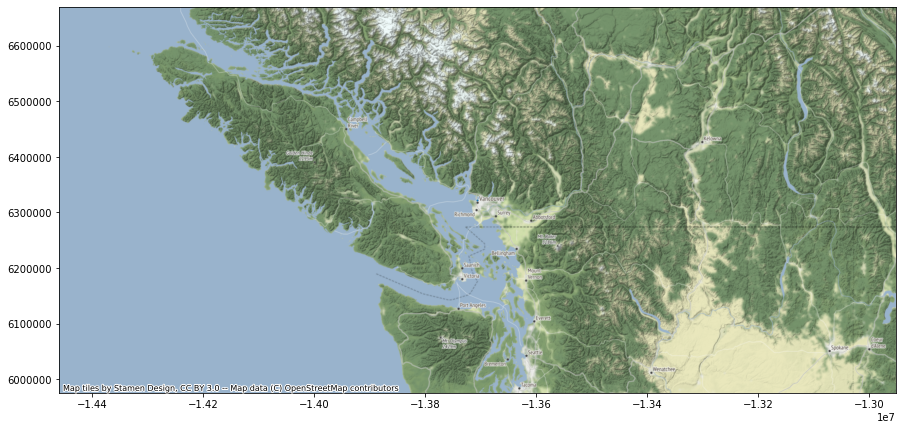

In [10]:
import contextily 
import matplotlib.pyplot as plt
# A figure of all restaurants with background
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(x2, y2, 'o', markersize=1)
contextily.add_basemap(ax)
plt.show()

We can apply this transformation to the remaining coordinates in the scatter plot using a for loop.

If you are curious ask and I can show you at the end of this workshop.

In [11]:
transformedLat = []
transformedLng = []
for lat,lng in zip(art_df['latitude'].to_list(),art_df['longitude'].to_list()):
    x2,y2 = transform(inProj,outProj,lng,lat)
    transformedLat.append(y2)
    transformedLng.append(x2)


The result is a static map with the location of art.

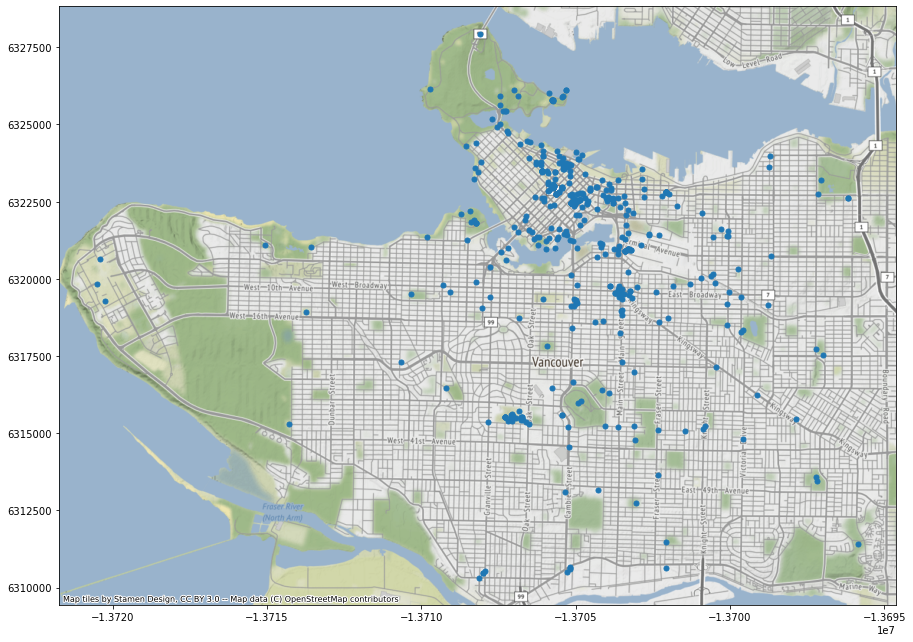

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(transformedLng, transformedLat, 'o', markersize=5)
contextily.add_basemap(ax)
plt.show()

#### Can we make this interactive? 

Yes!!!

In [13]:
map_osm=folium.Map(location=SC_COORDINATES, zoom_start=10, tiles='Stamen Terrain')
marker_cluster = MarkerCluster().add_to(map_osm) 
MAX_rec = len(art_df)

In [14]:
for each in art_df[0:MAX_rec].iterrows():
    location = [each[1]['latitude'],each[1]['longitude']]
    popup = (str(each[1]['fields.url']) + ":" + str(each[1]['fields.artistprojectstatement']))
    marker = folium.Marker(location=location, popup= popup)
    marker.add_to(marker_cluster)
display(map_osm)

![](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)